In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
# import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Train test split params
seed = 0
test_size = 0.4

# Add good/bad column
df['good'] = df['quality'].apply(lambda x: 1 if x>6.5 else 0)

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='jet')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052,0.120061
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373,0.214716
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316,0.0477789
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907,-0.0973076
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561,-0.0717473
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851,-0.139517
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919,-0.15046
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314,-0.0572833
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397,0.199485


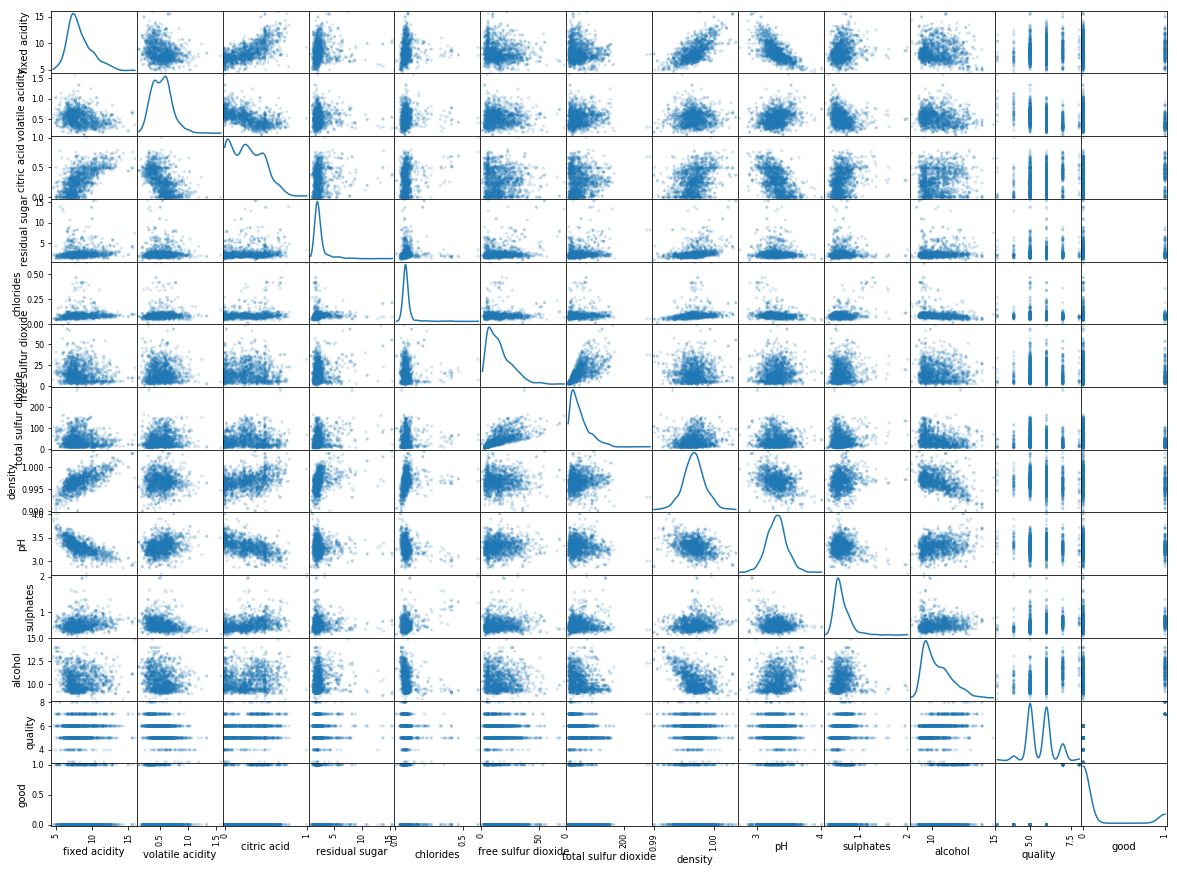

In [5]:
scatter_matrix(df, alpha=0.2, figsize=(20, 15), diagonal='kde');

In [6]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
df.apply(minMax)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3,0
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8,1


In [7]:
# Split X and Y data from df
y = df['good']
del df['good']
del df['quality']
x = df

In [8]:
# Split data (aligned w/ Adam)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [9]:
# Random forest classification
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                             min_samples_split=2, random_state=seed)
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       574
           1       0.46      0.53      0.49        66

   micro avg       0.89      0.89      0.89       640
   macro avg       0.70      0.73      0.71       640
weighted avg       0.90      0.89      0.89       640

